For Text Mining assignment
 
 ONE:
1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install spacy

In [3]:
!pip install wordcloud

In [4]:
import string
import spacy
from matplotlib.pyplot import imread

In [5]:
data=pd.read_csv("C:\\Users\\amind\\Downloads\\Elon_musk.csv",encoding="ISO-8859-1")
data

Unnamed: 0                                               Text
0              1                             @kunalb11 Im an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

In [6]:
data.drop(columns='Unnamed: 0',inplace=True)

In [7]:
data

Text
0                                @kunalb11 Im an alien
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                   @joerogan @Spotify Great interview!
3                       @gtera27 Doge is underestimated
4     @teslacn Congratulations Tesla China for amazi...
...                                                 ...
1994  @flcnhvy True, it sounds so surreal, but the n...
1995  @PPathole Make sure to read ur terms &amp; con...
1996                @TeslaGong @PPathole Samwise Gamgee
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                          Progress update August 28

[1999 rows x 1 columns]

In [8]:
len(data)

1999

In [9]:
data.isnull().sum()

Text    0
dtype: int64

In [10]:
data

Text
0                                @kunalb11 Im an alien
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                   @joerogan @Spotify Great interview!
3                       @gtera27 Doge is underestimated
4     @teslacn Congratulations Tesla China for amazi...
...                                                 ...
1994  @flcnhvy True, it sounds so surreal, but the n...
1995  @PPathole Make sure to read ur terms &amp; con...
1996                @TeslaGong @PPathole Samwise Gamgee
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                          Progress update August 28

[1999 rows x 1 columns]

In [11]:
len(data)

1999

In [12]:
data = [Text.strip() for Text in data.Text] 
data = [Text for Text in data if Text]
data

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [13]:
# Joining the list into one string/text
text = ' '.join(data)
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [14]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) 
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amind\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['kunalb11', 'I\x92m', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo']


In [17]:
#Normalize the data
lower_words = [text.lower() for text in text_tokens]
print(lower_words[0:25])

['kunalb11', 'i\x92m', 'an', 'alien', 'idaacarmack', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'nextlevel', 'have', 'you', 'tried', 'it', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'is', 'underestimated']


In [18]:
#Remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amind\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
my_stop_words = stopwords.words('english')
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
my_stop_words.append('the')
no_stop_tokens = [word for word in lower_words if not word in my_stop_words]
print(no_stop_tokens[0:40])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy']


In [21]:
len(no_stop_tokens)

14882

In [22]:
len(lower_words)

21078

In [23]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [24]:
stemmed_tokens = [ps.stem(word) for word in no_stop_tokens]
print(stemmed_tokens[0:40])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'thought', 'would', 'fail', 'httpstcozgxjfdzzrm', 'owenspark', 'flcnhvi']


In [25]:
!python -m spacy download en_core_web_md

     ---------------------------------------- 42.8/42.8 MB 3.4 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [26]:
nlp = spacy.load('en_core_web_md')

In [27]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(stemmed_tokens))
print(doc[0:40])

kunalb11 im alien idaacarmack ray trace cyberpunk hdr nextlevel tri joerogan spotifi great interview gtera27 doge underestim teslacn congratul tesla china amaz execut last year next even happi new year ox httpstco9wfkmyu2oj frodo underdog thought would fail httpstcozgxjfdzzrm owenspark flcnhvi


In [28]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year']


In [29]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amind\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\amind\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [31]:
for w in lower_words:
    print(w, " : ", lemmatizer.lemmatize(w))

kunalb11  :  kunalb11
im  :  im
an  :  an
alien  :  alien
idaacarmack  :  idaacarmack
ray  :  ray
tracing  :  tracing
on  :  on
cyberpunk  :  cyberpunk
with  :  with
hdr  :  hdr
is  :  is
nextlevel  :  nextlevel
have  :  have
you  :  you
tried  :  tried
it  :  it
joerogan  :  joerogan
spotify  :  spotify
great  :  great
interview  :  interview
gtera27  :  gtera27
doge  :  doge
is  :  is
underestimated  :  underestimated
teslacn  :  teslacn
congratulations  :  congratulation
tesla  :  tesla
china  :  china
for  :  for
amazing  :  amazing
execution  :  execution
last  :  last
year  :  year
now  :  now
on  :  on
to  :  to
the  :  the
next  :  next
for  :  for
even  :  even
more  :  more
happy  :  happy
new  :  new
year  :  year
of  :  of
the  :  the
ox  :  ox
httpstco9wfkmyu2oj  :  httpstco9wfkmyu2oj
frodo  :  frodo
was  :  wa
the  :  the
underdoge  :  underdoge
all  :  all
thought  :  thought
he  :  he
would  :  would
fail  :  fail
himself  :  himself
most  :  most
of  :  of
all  :  al

In [32]:
one_block = doc
one_block
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [33]:
one_block

kunalb11 im alien idaacarmack ray trace cyberpunk hdr nextlevel tri joerogan spotifi great interview gtera27 doge underestim teslacn congratul tesla china amaz execut last year next even happi new year ox httpstco9wfkmyu2oj frodo underdog thought would fail httpstcozgxjfdzzrm owenspark flcnhvi anonyx10 haha thank flcnhvi anonyx10 inde tweet definit repres realworld time alloc entertain outcom like givedirectli sent agre clubhous kanyewest httpstco3rwe9uhst geoffkeighley unrealengin it get real bought dogecoin lil x toddler hodler joshmanmod definit issu sentenc seem bit high freewalletorg thank fix freewalletorg pleas unlock account astrojordi u0001f923u0001f923 true power haha httpstcofc9uhqsd7o freewalletorg crypto wallet wont give privat key avoid cost freewalletorg app suck rt spacex nasa select falcon heavi launch first two element lunar gateway togeth one mission httpstco3pwt ajtourvil ye blkmdl3 rationaletienn adamklotz predict cash flow reason well starlink ipo rationaletien

In [34]:
doc_block

kunalb11 im alien idaacarmack ray trace cyberpunk hdr nextlevel tri joerogan spotifi great interview gtera27 doge underestim teslacn congratul tesla china amaz execut last year next even happi new year ox httpstco9wfkmyu2oj frodo underdog thought would fail httpstcozgxjfdzzrm owenspark flcnhvi anonyx10 haha thank flcnhvi anonyx10 inde tweet definit repres realworld time alloc entertain outcom like givedirectli sent agre clubhous kanyewest httpstco3rwe9uhst geoffkeighley unrealengin it get real bought dogecoin lil x toddler hodler joshmanmod definit issu sentenc seem bit high freewalletorg thank fix freewalletorg pleas unlock account astrojordi u0001f923u0001f923 true power haha httpstcofc9uhqsd7o freewalletorg crypto wallet wont give privat key avoid cost freewalletorg app suck rt spacex nasa select falcon heavi launch first two element lunar gateway togeth one mission httpstco3pwt ajtourvil ye blkmdl3 rationaletienn adamklotz predict cash flow reason well starlink ipo rationaletien

In [35]:
for token in doc_block:
    print(token, token.pos_)

kunalb11 PROPN
im PROPN
alien PROPN
idaacarmack PROPN
ray NOUN
trace NOUN
cyberpunk NOUN
hdr PROPN
nextlevel NOUN
tri VERB
joerogan PROPN
spotifi PROPN
great ADJ
interview NOUN
gtera27 NOUN
doge PROPN
underestim PROPN
teslacn PROPN
congratul PROPN
tesla PROPN
china PROPN
amaz ADV
execut PROPN
last ADJ
year NOUN
next ADV
even ADV
happi PROPN
new ADJ
year PROPN
ox PROPN
httpstco9wfkmyu2oj PROPN
frodo PROPN
underdog NOUN
thought NOUN
would AUX
fail VERB
httpstcozgxjfdzzrm NOUN
owenspark PROPN
flcnhvi PROPN
anonyx10 NOUN
haha VERB
thank PROPN
flcnhvi PROPN
anonyx10 X
inde VERB
tweet PROPN
definit PROPN
repres VERB
realworld PROPN
time NOUN
alloc PROPN
entertain PROPN
outcom PROPN
like SCONJ
givedirectli PROPN
sent VERB
agre NOUN
clubhous ADJ
kanyewest ADJ
httpstco3rwe9uhst PROPN
geoffkeighley ADJ
unrealengin ADJ
it PROPN
get VERB
real ADV
bought VERB
dogecoin NOUN
lil PROPN
x SYM
toddler PROPN
hodler PROPN
joshmanmod PROPN
definit PROPN
issu PROPN
sentenc NOUN
seem VERB
bit NOUN
high ADJ

In [36]:
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs)

['ray', 'trace', 'cyberpunk', 'nextlevel', 'tri', 'interview', 'gtera27', 'year', 'underdog', 'thought', 'fail', 'httpstcozgxjfdzzrm', 'anonyx10', 'haha', 'inde', 'repres', 'time', 'sent', 'agre', 'get', 'bought', 'dogecoin', 'sentenc', 'seem', 'bit', 'unlock', 'account', 'power', 'haha', 'httpstcofc9uhqsd7o', 'wallet', 'give', 'key', 'avoid', 'cost', 'launch', 'element', 'gateway', 'mission', 'ajtourvil', 'predict', 'cash', 'flow', 'reason', 'starlink', 'staggeringli', 'technic', 'pass', 'chasm', 'cash', 'flow', 'year', 'cost', 'ton', 'carbon', 'valu', 'product', 'made', 'scalabl', 'meant', 'price', 'countri', 'differ', 'tax', 'amp', 'ship', 'tobyliiiiiiiiii', 'intend', 'earth', 'idea', 'coindesk', 'tesla', 'danzpalm', 'xprize', 'team', 'manag', 'carbon', 'prize', 'take', 'tabl', 'miss', 'work', 'go', 'seem', 'bit', 'appear', 'meaning', 'fix', 'coin', 'unit', 'time', 'michaelhodapp', 'orbit', 'launch', 'tower', 'stack', 'raptor', 'orbit', 'booster', 'improv', 'ship', 'mass', 'michaelh

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq=[(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

In [38]:
wf_df

word  count
0          tesla     51
1           make     51
2         launch     50
3          engin     49
4         spacex     47
...          ...    ...
1792      answer      1
1793       tweet      1
1794  propaganda      1
1795       click      1
1796       gamge      1

[1797 rows x 2 columns]

In [39]:
print(X)

  (0, 1245)	1
  (1, 1633)	1
  (2, 354)	1
  (3, 1037)	1
  (4, 1646)	1
  (5, 831)	1
  (6, 630)	1
  (7, 1790)	1
  (8, 1687)	1
  (9, 1600)	1
  (10, 516)	1
  (11, 779)	1
  (12, 56)	1
  (13, 635)	1
  (14, 809)	1
  (15, 1278)	1
  (16, 1606)	1
  (17, 1368)	1
  (18, 30)	1
  (19, 600)	1
  (20, 166)	1
  (21, 416)	1
  (22, 1369)	1
  (23, 1360)	1
  (24, 138)	1
  :	:
  (5124, 1113)	1
  (5125, 1716)	1
  (5126, 1490)	1
  (5127, 1070)	1
  (5128, 1111)	1
  (5129, 1490)	1
  (5130, 1739)	1
  (5131, 57)	1
  (5132, 1668)	1
  (5133, 662)	1
  (5134, 170)	1
  (5135, 814)	1
  (5136, 31)	1
  (5137, 1729)	1
  (5138, 1206)	1
  (5139, 49)	1
  (5140, 543)	1
  (5141, 944)	1
  (5142, 1249)	1
  (5143, 1568)	1
  (5144, 253)	1
  (5145, 13)	1
  (5146, 591)	1
  (5147, 441)	1
  (5148, 1202)	1


In [40]:
print(sum_words)

[[1 1 1 ... 2 1 3]]


In [41]:
print(words_freq)

[('tesla', 51), ('make', 51), ('launch', 50), ('engin', 49), ('spacex', 47), ('teslarati', 46), ('need', 45), ('work', 42), ('product', 41), ('year', 40), ('come', 37), ('amp', 36), ('land', 36), ('time', 34), ('use', 34), ('get', 32), ('go', 31), ('test', 30), ('flight', 30), ('car', 28), ('day', 28), ('lot', 28), ('flcnhvi', 25), ('starship', 25), ('model', 22), ('space', 20), ('think', 19), ('way', 19), ('seem', 18), ('look', 18), ('point', 18), ('differ', 17), ('orbit', 17), ('improv', 17), ('peopl', 17), ('crew', 17), ('rocket', 17), ('probabl', 17), ('mission', 16), ('take', 16), ('thing', 16), ('week', 16), ('team', 15), ('booster', 15), ('futur', 15), ('erdayastronaut', 15), ('feel', 15), ('hope', 15), ('design', 15), ('wholemarsblog', 15), ('fsd', 15), ('fire', 15), ('thank', 15), ('part', 14), ('done', 14), ('made', 13), ('ship', 13), ('kristennetten', 13), ('start', 13), ('oper', 13), ('stage', 13), ('problem', 13), ('complet', 13), ('support', 13), ('dragon', 13), ('earth',

<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

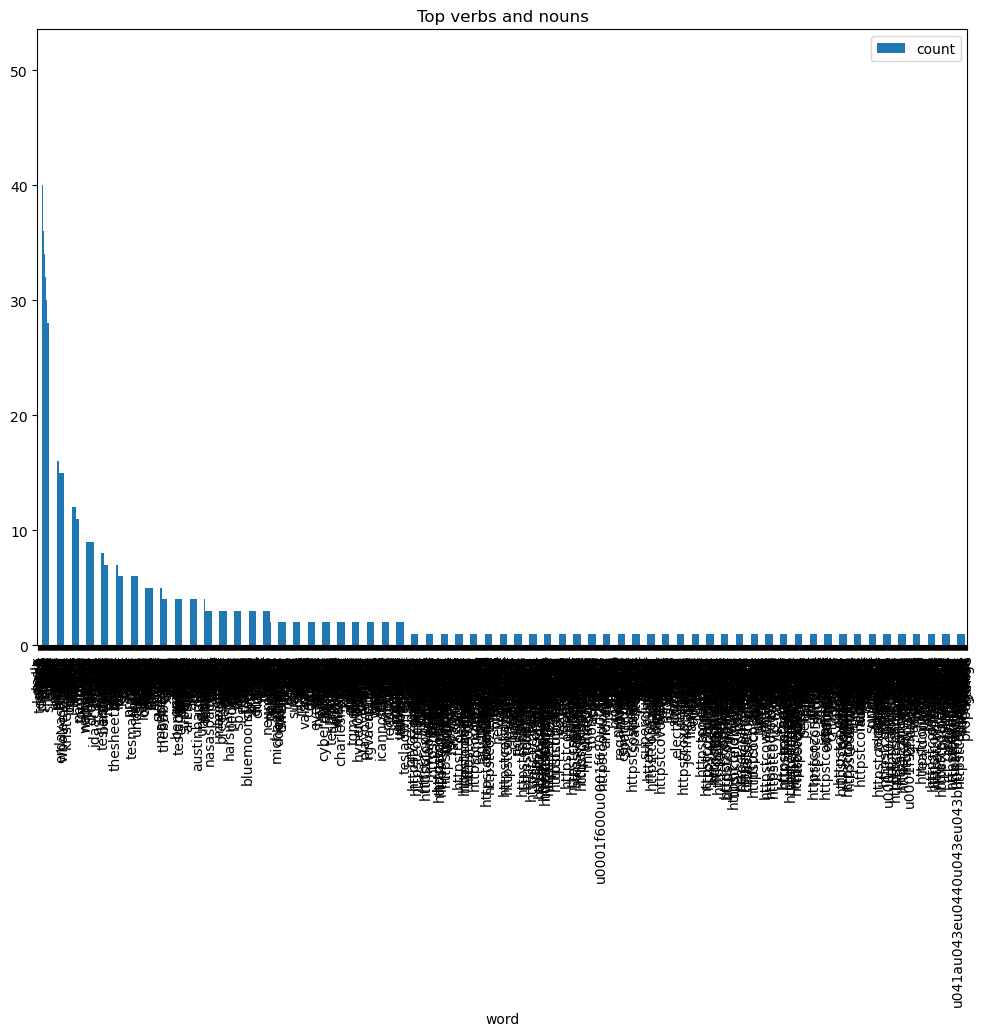

In [42]:
wf_df.plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

In [43]:
import string
import spacy

In [44]:
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt

In [45]:
affin=pd.read_csv("C:\\Users\\amind\\Downloads\\Afinn.csv",encoding="ISO-8859-1")
affin

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [46]:
import nltk

In [47]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amind\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(data))
sentences[0:10]

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [49]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

sentence
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1                                   Have you tried it?
2                  @joerogan @Spotify Great interview!
3    @gtera27 Doge is underestimated @teslacn Congr...
4                   Now on to the next for even more!!
..                                                 ...
919  @kenyanwalstreet Not actually a payout, just a...
920  It may never pay out, as the stock cant b
 ht...
921                                    Details Aug 28.
922  AI symbiosis while u wait @vistacruiser7 @flcn...
923  @TeslaGong @PPathole Samwise Gamgee @PPathole ...

[924 rows x 1 columns]

In [50]:
affinity_scores = affin.set_index('word')['value'].to_dict()

In [51]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [52]:
nlp = spacy.load('en_core_web_md')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [53]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)
sent_df

sentence  sentiment_value
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0
1                                   Have you tried it?                0
2                  @joerogan @Spotify Great interview!                3
3    @gtera27 Doge is underestimated @teslacn Congr...                3
4                   Now on to the next for even more!!                0
..                                                 ...              ...
919  @kenyanwalstreet Not actually a payout, just a...                0
920  It may never pay out, as the stock cant b
 ht...               -4
921                                    Details Aug 28.                0
922  AI symbiosis while u wait @vistacruiser7 @flcn...               -2
923  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0

[924 rows x 2 columns]

In [54]:
sent_df[sent_df.sentiment_value<-4]

sentence  sentiment_value
64   Also, the road to hell is mostly paved with ba...               -7
647  Very ba
 https://t.co/tJsh1Exz1Q @justpaulinel...               -8
837  Cool Model 3 review by @iamjamiefoxx https://t...               -7

In [55]:
sent_df[sent_df.sentiment_value>10]

sentence  sentiment_value
36   @ajtourville @Erdayastronaut @SpaceX Yes, but ...               14
42   @thejackbeyer @NASASpaceflight Cryoproof, then...               12
105  @Erdayastronaut @SpaceX Was also thinking that...               16
159  @harsimranbansal @heydave7 It will most likely...               11
184  Also, w
 https://t.co/IYdKttVsqk @cleantechnic...               12
585  The open areas
 https://t.co/rabjKrtQlw @Sav...               14
645  Its
 https://t.co/IxhyT6NuiC @Teslarati Tesla...               13
719  We just havent observed the
 https://t.co/mez...               17
817  Might be able to
 https://t.co/FB7e5nOq2E @Pri...               11

In [56]:
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df

sentence  sentiment_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
2                  @joerogan @Spotify Great interview!                3   
3    @gtera27 Doge is underestimated @teslacn Congr...                3   
4                   Now on to the next for even more!!                0   
..                                                 ...              ...   
919  @kenyanwalstreet Not actually a payout, just a...                0   
920  It may never pay out, as the stock cant b
 ht...               -4   
921                                    Details Aug 28.                0   
922  AI symbiosis while u wait @vistacruiser7 @flcn...               -2   
923  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0   

     word_count  
0            13  
1             4  
2             4  
3            13  
4             8  
..          ...  
919          11  
920          31  
921           3  
922          47  
923          15  

[924 rows x 3 columns]

In [57]:
sent_df.sort_values(by='sentiment_value').tail(10)

sentence  sentiment_value  \
224  @PPathole @karpathy For a second there, I thou...               10   
159  @harsimranbansal @heydave7 It will most likely...               11   
817  Might be able to
 https://t.co/FB7e5nOq2E @Pri...               11   
42   @thejackbeyer @NASASpaceflight Cryoproof, then...               12   
184  Also, w
 https://t.co/IYdKttVsqk @cleantechnic...               12   
645  Its
 https://t.co/IxhyT6NuiC @Teslarati Tesla...               13   
36   @ajtourville @Erdayastronaut @SpaceX Yes, but ...               14   
585  The open areas
 https://t.co/rabjKrtQlw @Sav...               14   
105  @Erdayastronaut @SpaceX Was also thinking that...               16   
719  We just havent observed the
 https://t.co/mez...               17   

     word_count  
224          69  
159          93  
817          72  
42           84  
184          98  
645          65  
36          231  
585         138  
105          94  
719          72

In [58]:
sent_df['sentiment_value'].describe()

count    924.000000
mean       1.341991
std        2.674856
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment_value, dtype: float64

In [59]:
sent_df['index']=range(0,len(sent_df))
sent_df

sentence  sentiment_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
2                  @joerogan @Spotify Great interview!                3   
3    @gtera27 Doge is underestimated @teslacn Congr...                3   
4                   Now on to the next for even more!!                0   
..                                                 ...              ...   
919  @kenyanwalstreet Not actually a payout, just a...                0   
920  It may never pay out, as the stock cant b
 ht...               -4   
921                                    Details Aug 28.                0   
922  AI symbiosis while u wait @vistacruiser7 @flcn...               -2   
923  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0   

     word_count  index  
0            13      0  
1             4      1  
2             4      2  
3            13      3  
4             8      4  
..          ...    ...  
919          11    919  
920          31    920  
921           3    921  
922          47    922  
923          15    923  

[924 rows x 4 columns]

In [60]:
sent_df['Sentiment_Class'] = pd.cut(x=sent_df['sentiment_value'],bins=[-8, -1, 0, 17], 
                                    labels=['Negative','Neutral','Positive'], right = True)
sent_df.sample(10)

sentence  sentiment_value  \
372  That convertible loan gave us 6 months of runway.                0   
828  @Teslarati Whoa cool @TheOnion <U+0001F923><U+...                1   
782  @Astro_Doug &amp; @AstroBehnken will spend one...                0   
693  https://t.co/zTRMvQ6Wvx He might run for Presi...                3   
426  That we now have the beginnings of a Starship ...                2   
772                        Hop attempt in ~33 minutes.                0   
138  @karpathy If they dont love us, were in deep...                1   
817  Might be able to
 https://t.co/FB7e5nOq2E @Pri...               11   
187  @Tesmanian_com Giga Berlin-Brandenburg will be...                4   
434  How much ti
 https://t.co/xMeMO5Nu0M @StephenK...                0   

     word_count  index Sentiment_Class  
372           9    372         Neutral  
828          25    828        Positive  
782          17    782         Neutral  
693          43    693        Positive  
426          14    426        Positive  
772           5    772         Neutral  
138          10    138        Positive  
817          72    817        Positive  
187          47    187        Positive  
434           6    434         Neutral

In [61]:
sent_df['Sentiment_Class'].value_counts()

Positive    427
Neutral     387
Negative    109
Name: Sentiment_Class, dtype: int64

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

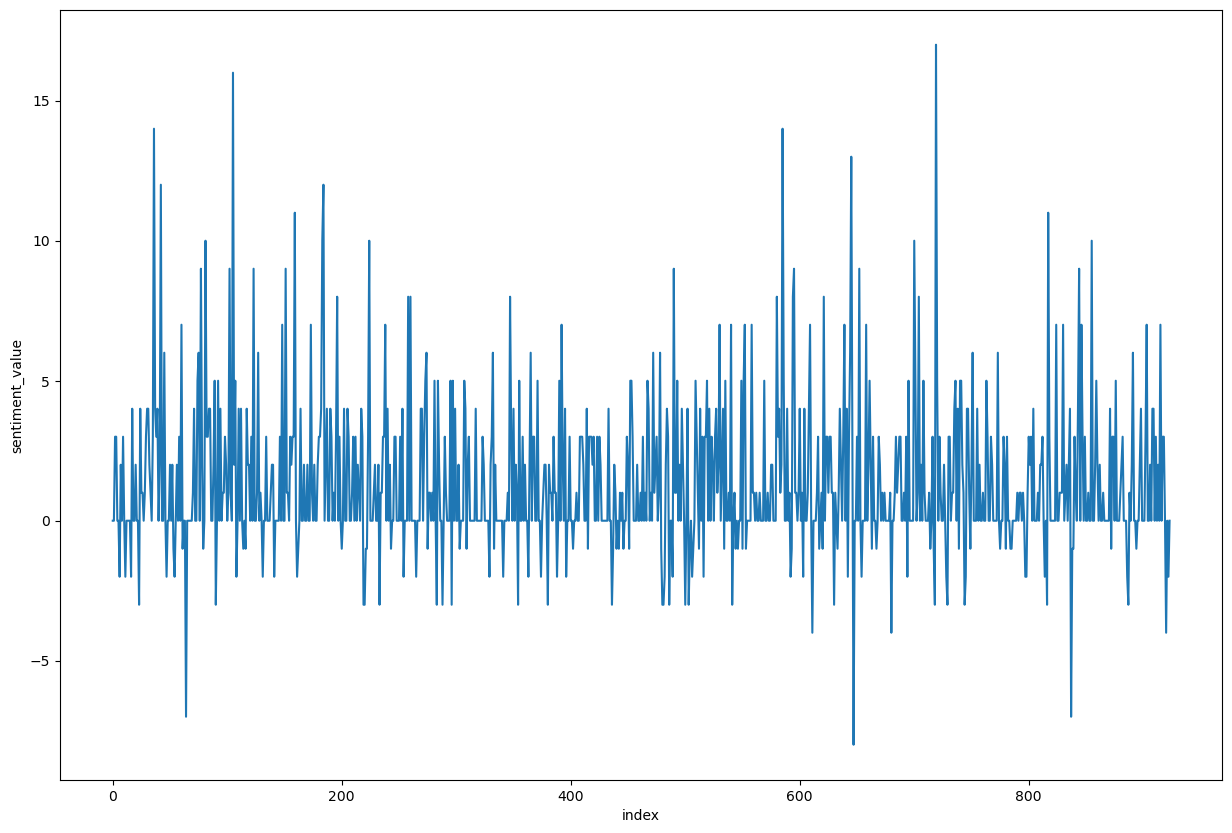

In [63]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

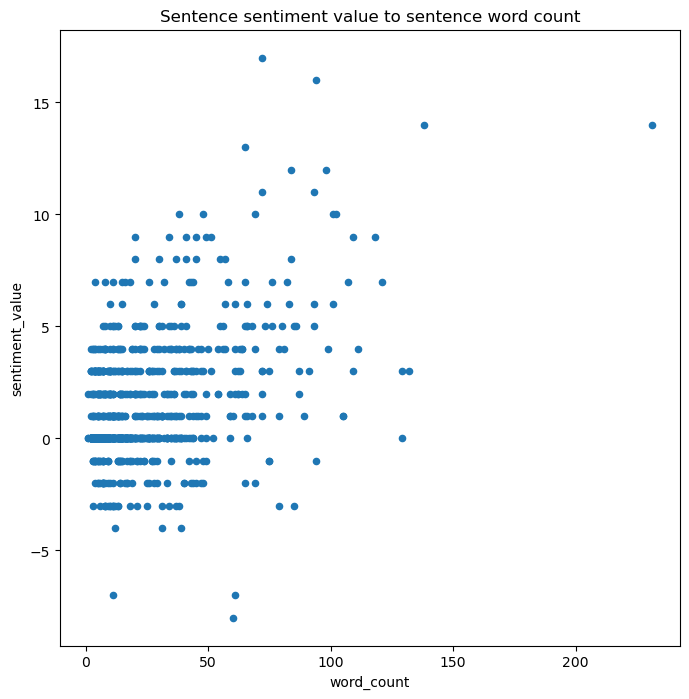

In [64]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

In [65]:
sent_df['sentiment_Class'] = pd.cut(x=sent_df['sentiment_value'],bins=[-8, -1, 0, 17], 
                                    labels=['Negative','Neutral','Positive'], right = True)
sent_df.sample(10)

sentence  sentiment_value  \
537                                        @EvaFoxU !!                0   
472  @RationalEtienne @28delayslater Thank you, muc...                6   
650  In a study that SpaceX did working with Harvar...                3   
146                                        Great game.                3   
282  The
 https://t.co/EUXoocFR9T @pcgamer We shoul...                0   
598  Usable tunnel depth far e
 https://t.co/lqfdQw...                0   
239  Better do new Roadster at some point<U+0001F62C>.                0   
24   So 
 its finally come to this 
 https://t.co/...                4   
565  @tobyliiiiiiiiii @Erdayastronaut Yeah, but mig...                1   
885  @flcnhvy Yes @PPathole No prior neuroscience b...                0   

     word_count  index Sentiment_Class sentiment_Class  
537           2    537         Neutral         Neutral  
472          28    472        Positive        Positive  
650          72    650        Positive        Positive  
146           2    146        Positive        Positive  
282          17    282         Neutral         Neutral  
598          15    598         Neutral         Neutral  
239           7    239         Neutral         Neutral  
24           13     24        Positive        Positive  
565          12    565        Positive        Positive  
885           9    885         Neutral         Neutral

In [66]:
sent_df['sentiment_Class'].value_counts()

Positive    427
Neutral     387
Negative    109
Name: sentiment_Class, dtype: int64

In [67]:
# After performing sentiment analysis we can conclude that most sentences of it are positive

In [68]:
# Generate WordCloud

In [69]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

In [70]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

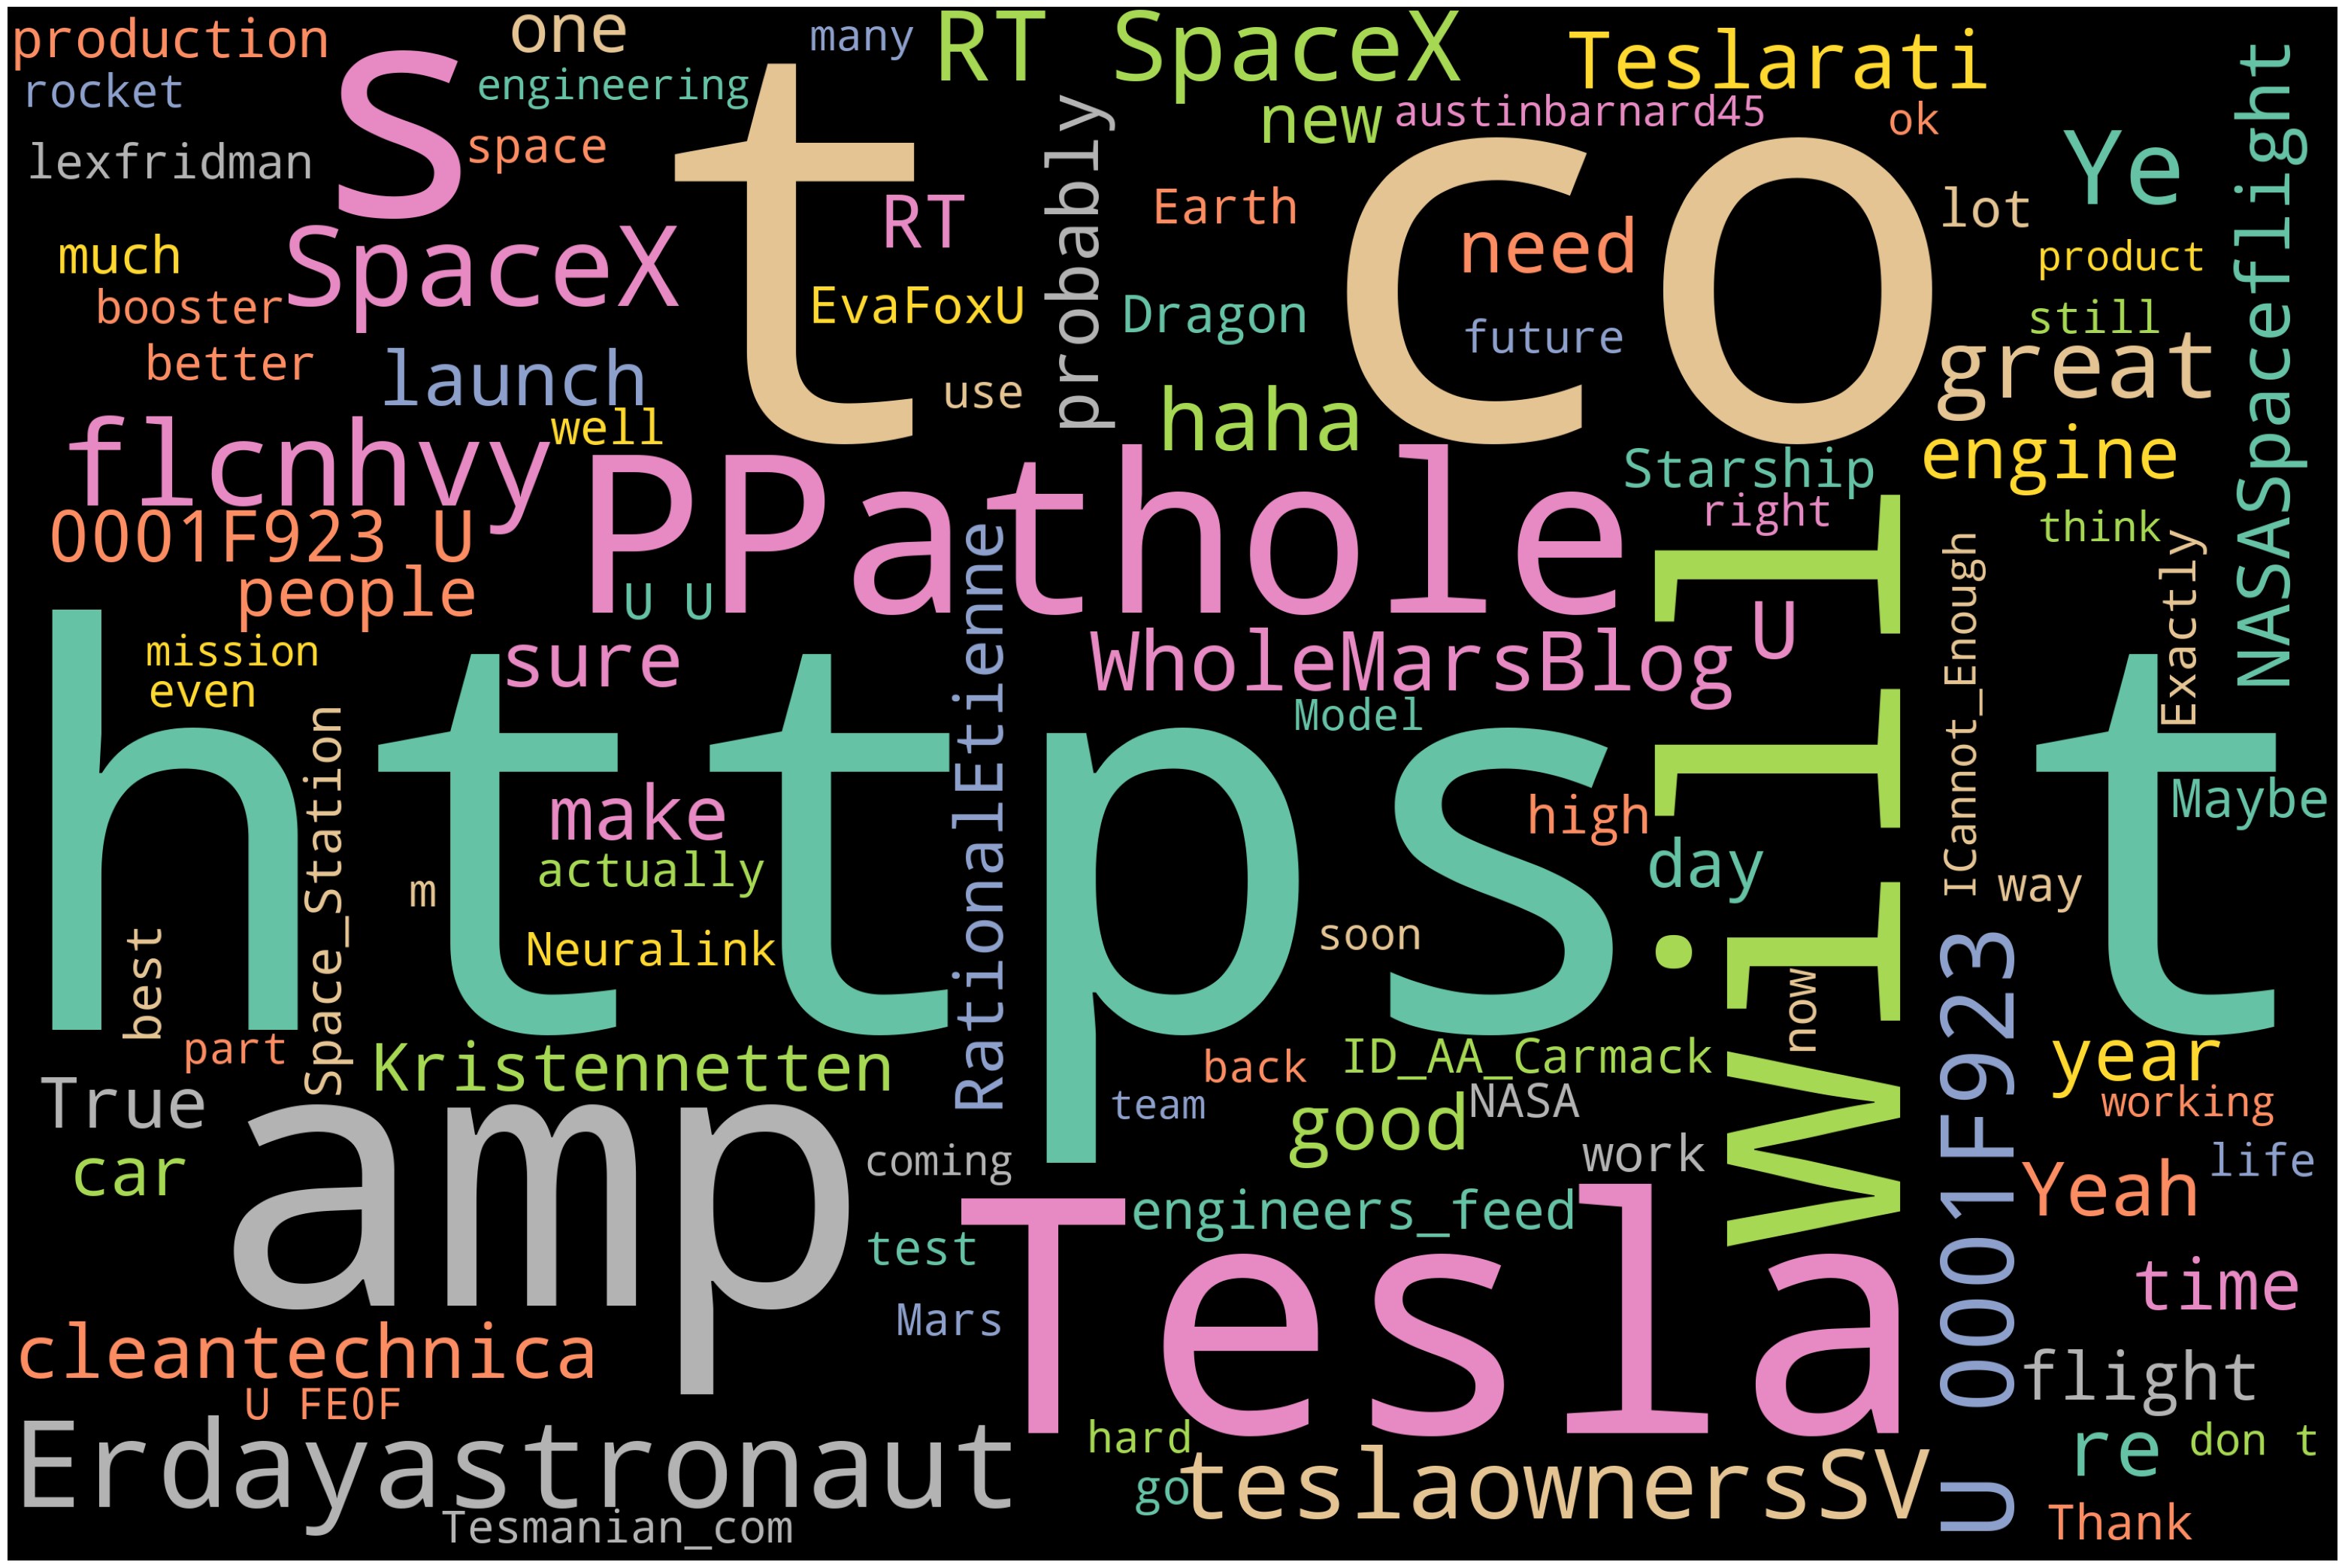

In [70]:
# Generate wordcloud
stopwords = STOPWORDS
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,
                      colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)